<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/example_chameleon_ds1_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import os.path
import requests
from numpy import genfromtxt

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

In [ ]:
dataset = 'cham_01' # let us take Chameleon DS1 dataset as an example
url = "https://zerobytes.one/denmune_data/"
file_ext = ".txt"

dataset_url = url + dataset + file_ext
data_path = 'sample_data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
data_file = data_path + dataset + file_ext #  i.e. 'iris' + '.txt' ==> iris.txt

if  not os.path.isfile(data_path + dataset + file_ext):
    req = requests.get(dataset_url)
    with open(data_path + dataset + file_ext, 'wb') as f:
        f.write(req.content)
data = genfromtxt(data_file , delimiter='\t') 

Chameleon DS4 dataset : DenMune Clustering


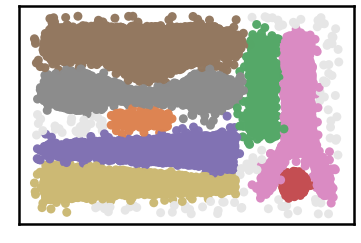

0

In [ ]:
# Denmune's Paramaters
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_groundtrugh = True  # show plots on/off
show_noise = True # show noise and outlier on/off

knn = 39
dm = DenMune(data=data,  k_nearest=knn, verpose=verpose_mode, show_noise=show_noise, rgn_tsne=False, )
labels_pred = dm.fit_predict()      

# Let us plot the results produced using DenMune
print ("Chameleon DS1 dataset", ": DenMune Clustering")
dm.plot_clusters(labels=labels_pred, show_noise=show_noise)
